### Paola Della Foglia matr. 961014

# <span style="color:red"> Esercitazione 2</span>

## <span style="color:blue"> Esercizio 2.1</span>
### Scopo
Lo scopo dell'esercizione è calcolare il seguente integrale 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$ usando il `metodo Monte Carlo`, nella prima parte dell'esercizio, usiamo come tecnica di campionamento una distribuzione uniforme tra 0 e 1, mentre nella seconda parte applichiamo la tecnica dell'`importance sampling`.

### Compilazione
Il codice, si trova nella cartella <font face = "Courier"> Ex 02.1 </font>. Per compilarlo occore usare, da shell unix, il comando <font face = "Courier"> `$make` </font> e per eseguirlo <font face = "Courier"> `$./main.exe` </font>. Dopo aver eseguito il programma, verranno prodotti due risultati in output:

    1-('MC.txt') in cui sono salvati i valori medi dell'integrale calcolato con il metodo MOnte Carlo e le incertezze associate in funzione del numero di blocchi.
    2-('Importance_Sampling.txt') in cui sono salvati i valori medi dell'integrale calcolato con il metodo dell'Importance Sampling e le incertezze associate in funzione del numero di blocchi.

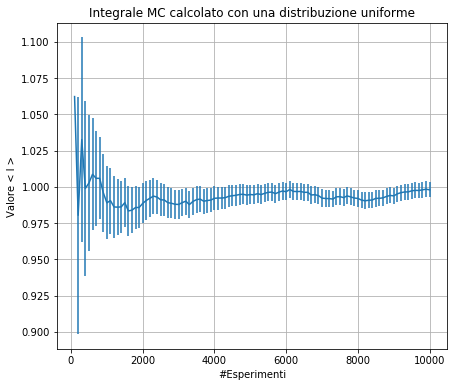

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
#Grafico stima valore integrale 1D metodo Monte Carlo e incertezza relativa
plt.rcParams['figure.figsize'] = [7, 6]
x1,y1,err1=np.loadtxt("ex02.1/MC.txt",usecols=(0,1,2), delimiter=' ', unpack=True)
plt.errorbar(x1,y1,err1) 
plt.title('Integrale MC calcolato con una distribuzione uniforme')
plt.xlabel('#Esperimenti')
plt.ylabel('Valore < I >')
plt.grid(True)
plt.show()

Il valore di $I$, calcolato con il `metodo Monte Carlo`, tende al valore di aspettazione 1.

### Importance sampling
Per calcolare l'integrale precedente con il metodo dell'Importance Sampling lo riscriviamo come:
$$I = \int_{0}^{1} \frac{\pi}{2}\cos(\pi x/2) dx = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) \frac{p(x)}{p(x)}dx$$
dove $p(x)\ge0 \forall x\in [0,1] $ e $\int_{0}^{1}p(x)dx=1$. Si generano punti che seguono $p(x)$ invece di generare punti uniformemente distribuiti in $[0,1]$. E' possibile dimostrare che più $p(x)$ approssima l'integranda, più possiamo ridurre il valore della varianza. Quindi possiamo espandere l'integranda secondo uno sviluppo di Taylor arrestato al secondo ordine e usare il metodo dell'inversa della funzione cumulativa per generare punti distribuiti lungo $p(x)$. Questo modo di procedere è molto complicato in quanto perché il primo termine diverso da zero nell'espansione del coseno è $O(x^2)$, quindi quando calcoliamo la cumulativa otteniamo polinomi di terzo grado che non possono essere invertiti analiticamente.
Si approssima quindi il coseno con una funzione lineare: imponiamo $p(0)=\frac{\pi}{2}\cos(\pi 0/2)=\frac{\pi}{2}$ e $p(1)=0$ $\to$ $p(x)=\frac{\pi}{2}(1-x)$, ma deve essere normalizzata in questo modo $p(x) = 2(1-x)$. La funzione cumulativa è:

$$F(x)=\int_{0}^{x} p(t)dt=\int_{0}^{x} 2(1-t)dt=2\big(t-\frac{t^2}{2}\big)\big|_{t=0}^{t=x}=2\big(x-\frac{x^2}{2}\big)$$

che può essere invertita in questo modo:

$$ 2\big(x-\frac{x^2}{2}\big) =  y $$

$$ x^2 -2x +y =0$$

$$x=1\pm\sqrt{1-y}=x=1-\sqrt{1-y}$$

Consideriamo la soluzione preceduta dal segno meno in quanto vogliamo un risultato che cada nell'intervallo $[0,1]$. Infine per ottenere il valore dell'integrale $I$ si calcola il valor medio di $\frac{\pi}{2}\frac{\cos(\pi x/2)}{2(1-x)}$ generando numeri distribuiti secondo $p(x)=2(1-x)$.

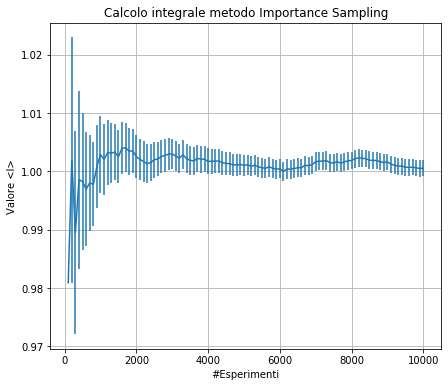

In [13]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
#Grafico stima valore integrale 1D metodo Importance Sampling e incertezza relativa
plt.rcParams['figure.figsize'] = [7, 6]
x2,y2,err2=np.loadtxt("ex02.1/Importance_Sampling.txt",usecols=(0,1,2), delimiter=' ', unpack=True)
plt.errorbar(x2,y2,err2) 
plt.title('Calcolo integrale metodo Importance Sampling')
plt.xlabel('#Esperimenti')
plt.ylabel('Valore <I>')
plt.grid(True)
plt.show()

Il valore di $I$ calcolato con il metodo Importance Sampling tende anch'esso al valore di aspettazione 1.
La differenza apprezzabile tra i due metodi si evince dal calcolo dell'errore sul valore dell'integrale: nel caso dell' `Importance Sampling` le barre di errore sono circa 4 volte più piccole di quelle del caso precedente (`Metodo Monte Carlo`).
Sotto è rappresentato il confronto tra i due metodi per il calcolo dell'integrale $I$. 

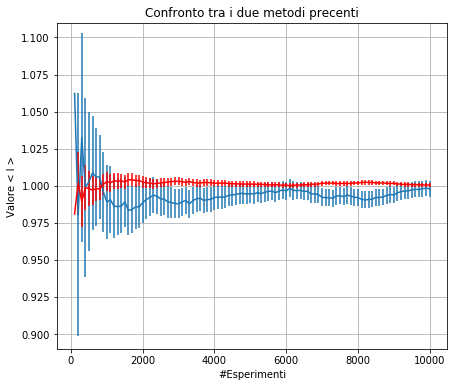

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
plt.rcParams['figure.figsize'] = [7, 6]
plt.errorbar(x1,y1,err1) #metodo MonteCarlo
plt.errorbar(x2,y2,err2, color='red') #metodo Importance Sampling
plt.xlabel('#Esperimenti')
plt.ylabel('Valore < I >')
plt.grid(True)
plt.title('Confronto tra i due metodi precenti')
axes = plt.gca()
axes.set_ylim([0.89,1.11])
plt.show()

Nota: nel grafico sopra riportato è possibile apprezzare un miglioramento sul calcolo dell'incertezza dell'integrale nel momento in cui utilizziamo il metodo dell'Importance Sampling.

## <span style="color:blue"> Esercizio 2.2</span>
### Scopo
Lo scopo di questo esercizio è simulare $N=10^4$ 3D random walk (cammini casuali),iniziando dall'origine, sia in un reticolo cubico di costante reticolare $a=1$ che nel continuo, e prendere il valore $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ con la sua incertezza in funzione del numero di passi.

### Compilazione
Il codice è nella cartella <font face = "Courier"> ex 02.2 </font>. Per compilarlo occore usare, da shell unix, il comando $make$ e per eseguirlo $./main.exe$. In output vengono prodotti 3 files : <i>'Discreto.txt'</i> e <i>'Continuo.txt'</i> che contengono i dati richiesti nei due differenti casi, e il file <i>'Esempio.txt'</i> che contiene tre esempi di random walk.

### Caso discreto
Per ogni step facciamo un passo in una direzione casuale (x, y, z) con una probabilità del $50%$ di farlo avanti e indietro.
I risultati sono riportati sotto tramite grafico.

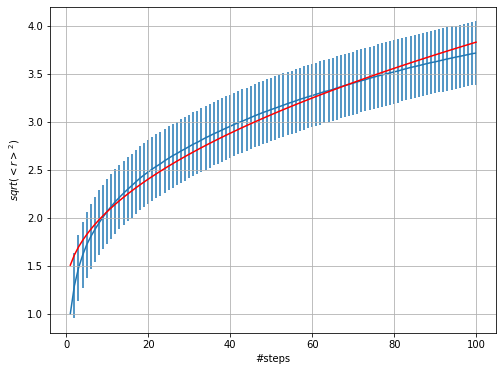

Best fit is f(N) =  0.25783718805764366  * sqrt(N) +  1.2483472183402606


In [17]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

plt.rcParams['figure.figsize'] = [8, 6]
xD, yD, errorD = np.loadtxt("ex02.2/Discreto.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(xD,yD,yerr=errorD,zorder=1)
plt.xlabel('#steps')
plt.ylabel("$sqrt(<r>^2)$")
plt.grid(True)
#plt.show()
#fit f(N)=k sqrt(N)
def f (x, k, a):
    return k * np.sqrt(x) + a

popt, pcov = curve_fit(f, xD, yD)
plt.plot(xD, f(xD, *popt), 'red', zorder=2)
plt.show()
print('Best fit is f(N) = ',popt[0], ' * sqrt(N) + ', popt[1] )

Si osserva che la distanza media dall'origine aumenta in modo strettamente crescente mentre l'incertezza decresce al crescere della distanza dall'origine. Ciò è strano, mi aspetterei anche per l'incertezza sui cammini un andamento strettamente crescente, in quanto essa dipende dal numero dei passi e all'aumentare del numero di passi aumenta la differenza tra i cammini. Il valore di $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ fitta molto bene con una funzione del tipo: $f(N)=a\sqrt{N}+b$ (linea rossa).

Ecco tre esempi di random walk nello spazio tridimensionale:

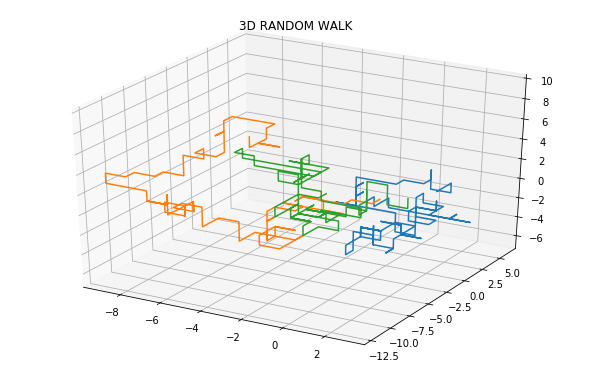

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = [8, 5]

x1, y1, z1 = np.loadtxt("ex02.2/Esempio.txt", usecols=(0,1,2), delimiter=' ', unpack='true', skiprows = 0, max_rows = 100)
x2, y2, z2 = np.loadtxt("ex02.2/Esempio.txt", usecols=(0,1,2), delimiter=' ', unpack='true', skiprows = 100, max_rows = 100)
x3, y3, z3 = np.loadtxt("ex02.2/Esempio.txt", usecols=(0,1,2), delimiter=' ', unpack='true', skiprows = 200, max_rows = 100)

fig=plt.figure()
ax=Axes3D(fig)

ax.plot(x1,y1,z1)
ax.plot(x2,y2,z2)
ax.plot(x3,y3,z3)
plt.title('3D RANDOM WALK')
plt.show()

### Caso Continuo
Lo scopo della seconda parte dell'ex02.2 è quello di generare una direzione casuale, per far ciò occorre generare un valore casuale per $\theta \in [0,\pi]$ e $\phi \in [0,2\pi]$ distribuiti secondo lo jacobiano $\sin \theta $. $\phi$ è generato a partire da una distribuzione uniforme in $[0,2\pi]$ e $\theta$ a partire da una distribuzione $\frac{1}{2}\sin\theta$ in $[0,\pi]$ dove $\frac{1}{2}$ è il fattore di normalizzazione. Per far ciò, usiamo il metodo dell'inversa della funzione cumulativa:

$$F(\theta)=\int_{0}^{\theta}\frac{1}{2} \sin \alpha d\alpha = -\frac{1}{2}\cos\alpha\big|_{\alpha=0}^{\theta}=\frac{1-\cos\theta}{2}=y$$

$$\theta = \arccos(1-2y)$$

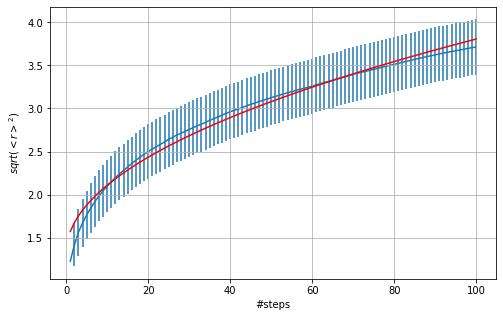

Best fit is f(N) =  0.24835471565094494  * sqrt(N) +  1.3227010069672376


In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

plt.rcParams['figure.figsize'] = [8, 5]

xC, yC, errorC = np.loadtxt("ex02.2/Continuo.txt", usecols=(0,1,2), delimiter=' ', unpack='true')
plt.errorbar(xC,yC,yerr=errorC, zorder=1)
plt.xlabel('#steps')
plt.ylabel("$sqrt(<r>^2)$")
plt.grid(True)
#fit f(N)=k sqrt(N)
def f (x, k, a):
    return k * np.sqrt(x) + a

popt, pcov = curve_fit(f, xC, yC)
plt.plot(xC, f(xC, *popt), 'red', zorder=2)
plt.show()
print('Best fit is f(N) = ',popt[0], ' * sqrt(N) + ', popt[1] )

Anche in questo caso il valore medio di $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ cresce secondo $f(N)=a\sqrt{N}+b$. Ciò indica che le random walks seguono un comportamento diffusivo. 
In un processo diffusivo, infatti, la densità di probabilità di trovare la particella nella posizione (x, y, z, t) è data da :

$$ \frac{\partial p}{\partial t}= D \bigg(\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2}+\frac{\partial^2 p}{\partial z^2}\bigg)$$

quindi la soluzione è: 

$$  p(x,y,z,t) = \frac{1}{\sqrt{4\pi D t}} e^{-\frac{x^2+y^2+z^2}{4Dt}}$$

Ora possiamo calcolare  $\langle \vec{r}_N \rangle_{RW}=\vec{0}$ e $\langle |\vec{r}_N|^2 \rangle_{RW} = 2Dt$ e così $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}\propto \sqrt{t}$ come osservato.